In [1]:
import pandas as pd
import numpy as np

In [2]:
go_ko = pd.read_csv('DESeq_up_down.txt', sep = '\t') ###### WT vs KO DEGs
go_ko.head()

,Unnamed: 0,id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NA.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,0610010F05Rik,513.036652,632.710471,393.362832,0.621711,-0.685685,0.000198,0.003985
4,16,0610010K14Rik,798.073717,636.221491,959.925943,1.508792,0.593394,0.000771,0.011711


In [3]:
go_gfp = pd.read_csv('up_sig_EKLF_GFP.csv') ###### Genes significantly enriched in EKLF/GFP+
go_gfp.head()

,Unnamed: 0,GENEID,GENENAME,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,1,ENSMUSG00000020900,Myh10,6532.840996,1.426303,0.100545,14.185707,1.123283e-45,2.150666e-43
1,2,ENSMUSG00000058620,Adra2b,957.360803,1.712878,0.127257,13.459990,2.689533e-41,3.814405e-39
2,3,ENSMUSG00000034127,Tspan8,1291.680675,1.593912,0.121430,13.126188,2.330972e-39,3.000294e-37
3,4,ENSMUSG00000028542,Slc6a9,2799.013199,1.691041,0.130395,12.968648,1.842520e-38,2.204834e-36
4,5,ENSMUSG00000027333,Smox,1017.225429,1.424975,0.109957,12.959368,2.079534e-38,2.450171e-36


In [4]:
go_ko.drop('Unnamed: 0', axis=1, inplace=True)
go_ko.head()

,id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0610010F05Rik,513.036652,632.710471,393.362832,0.621711,-0.685685,0.000198,0.003985
4,0610010K14Rik,798.073717,636.221491,959.925943,1.508792,0.593394,0.000771,0.011711


In [5]:
go_ko.dropna(inplace=True)
go_ko.head()

,id,baseMean,baseMeanA,baseMeanB,foldChange,log2FoldChange,pval,padj
3,0610010F05Rik,513.036652,632.710471,393.362832,0.621711,-0.685685,0.000198,0.003985
4,0610010K14Rik,798.073717,636.221491,959.925943,1.508792,0.593394,0.000771,0.011711
5,0610039K10Rik,325.191762,406.477365,243.906159,0.600049,-0.736849,0.002380,0.027607
6,1110014N23Rik,700.247356,578.820507,821.674205,1.419567,0.505450,0.004965,0.047132
10,1190005F20Rik,596.529056,470.482895,722.575217,1.535816,0.619006,0.000521,0.008586


In [6]:
go_ko.drop(columns=['baseMean','baseMeanA','baseMeanB',],inplace=True)
go_ko.head()

,id,foldChange,log2FoldChange,pval,padj
3,0610010F05Rik,0.621711,-0.685685,0.000198,0.003985
4,0610010K14Rik,1.508792,0.593394,0.000771,0.011711
5,0610039K10Rik,0.600049,-0.736849,0.002380,0.027607
6,1110014N23Rik,1.419567,0.505450,0.004965,0.047132
10,1190005F20Rik,1.535816,0.619006,0.000521,0.008586


In [7]:
go_ko.rename(columns={'id':'Gene Name','pval':'pvalue'},inplace=True)
go_ko.head()

,Gene Name,foldChange,log2FoldChange,pvalue,padj
3,0610010F05Rik,0.621711,-0.685685,0.000198,0.003985
4,0610010K14Rik,1.508792,0.593394,0.000771,0.011711
5,0610039K10Rik,0.600049,-0.736849,0.002380,0.027607
6,1110014N23Rik,1.419567,0.505450,0.004965,0.047132
10,1190005F20Rik,1.535816,0.619006,0.000521,0.008586


In [8]:
go_gfp.head()

,Unnamed: 0,GENEID,GENENAME,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,1,ENSMUSG00000020900,Myh10,6532.840996,1.426303,0.100545,14.185707,1.123283e-45,2.150666e-43
1,2,ENSMUSG00000058620,Adra2b,957.360803,1.712878,0.127257,13.459990,2.689533e-41,3.814405e-39
2,3,ENSMUSG00000034127,Tspan8,1291.680675,1.593912,0.121430,13.126188,2.330972e-39,3.000294e-37
3,4,ENSMUSG00000028542,Slc6a9,2799.013199,1.691041,0.130395,12.968648,1.842520e-38,2.204834e-36
4,5,ENSMUSG00000027333,Smox,1017.225429,1.424975,0.109957,12.959368,2.079534e-38,2.450171e-36


In [9]:
go_gfp.drop(columns=['Unnamed: 0','baseMean','lfcSE','stat'],inplace=True)
go_gfp.head()

,GENEID,GENENAME,log2FoldChange,pvalue,padj
0,ENSMUSG00000020900,Myh10,1.426303,1.123283e-45,2.150666e-43
1,ENSMUSG00000058620,Adra2b,1.712878,2.689533e-41,3.814405e-39
2,ENSMUSG00000034127,Tspan8,1.593912,2.330972e-39,3.000294e-37
3,ENSMUSG00000028542,Slc6a9,1.691041,1.842520e-38,2.204834e-36
4,ENSMUSG00000027333,Smox,1.424975,2.079534e-38,2.450171e-36


In [13]:
go_gfp.rename(columns={'GENENAME':'Gene Name','GENEID':'Gene ID'},inplace=True)
go_gfp.head()

,Gene ID,Gene Name,log2FoldChange,pvalue,padj
0,ENSMUSG00000020900,Myh10,1.426303,1.123283e-45,2.150666e-43
1,ENSMUSG00000058620,Adra2b,1.712878,2.689533e-41,3.814405e-39
2,ENSMUSG00000034127,Tspan8,1.593912,2.330972e-39,3.000294e-37
3,ENSMUSG00000028542,Slc6a9,1.691041,1.842520e-38,2.204834e-36
4,ENSMUSG00000027333,Smox,1.424975,2.079534e-38,2.450171e-36


In [14]:
ko_down = go_ko[go_ko['log2FoldChange']<0]
ko_down.head()

,Gene Name,foldChange,log2FoldChange,pvalue,padj
3,0610010F05Rik,0.621711,-0.685685,1.981741e-04,3.984913e-03
5,0610039K10Rik,0.600049,-0.736849,2.380017e-03,2.760667e-02
12,1300001I01Rik,0.643843,-0.635219,1.382066e-04,2.989009e-03
13,1300017J02Rik,0.035592,-4.812323,6.115374e-88,1.838383e-84
28,1700001L05Rik,0.164646,-2.602558,6.633024e-22,1.459023e-19


In [15]:
##### EKLF-dependent genes: genes significantly down in EKLF-/- and significantly up in EKLF/GFP+ ############
ko_gfp_merge = ko_down.merge(go_gfp, on='Gene Name')
ko_gfp_merge.head()

,Gene Name,foldChange,log2FoldChange_x,pvalue_x,padj_x,Gene ID,log2FoldChange_y,pvalue_y,padj_y
0,1300017J02Rik,0.035592,-4.812323,6.115374e-88,1.838383e-84,ENSMUSG00000033688,1.710540,2.845597e-22,1.055351e-20
1,2310022B05Rik,0.481951,-1.053041,3.735722e-08,2.073268e-06,ENSMUSG00000031983,0.735432,1.091179e-03,4.684302e-03
2,4931406P16Rik,0.606998,-0.720237,7.478298e-05,1.788940e-03,ENSMUSG00000066571,0.632105,1.722238e-03,7.030789e-03
3,5730508B09Rik,0.656275,-0.607627,6.285595e-04,9.997643e-03,ENSMUSG00000050549,0.860983,7.110646e-05,3.993904e-04
4,Abca7,0.607847,-0.718219,1.694640e-05,5.010856e-04,ENSMUSG00000035722,0.476437,9.798808e-03,3.153779e-02


In [16]:
ko_gfp_merge.drop(['foldChange','pvalue_x','padj_x','Gene ID','pvalue_y','padj_y'], axis=1, inplace=True)
ko_gfp_merge.head()

,Gene Name,log2FoldChange_x,log2FoldChange_y
0,1300017J02Rik,-4.812323,1.710540
1,2310022B05Rik,-1.053041,0.735432
2,4931406P16Rik,-0.720237,0.632105
3,5730508B09Rik,-0.607627,0.860983
4,Abca7,-0.718219,0.476437


In [17]:
ko_gfp_merge.rename(columns={'log2FoldChange_x':'KO_log2FC','log2FoldChange_y':'EKLF_GFP_log2FC'}, inplace=True)
ko_gfp_merge.head()

,Gene Name,KO_log2FC,EKLF_GFP_log2FC
0,1300017J02Rik,-4.812323,1.710540
1,2310022B05Rik,-1.053041,0.735432
2,4931406P16Rik,-0.720237,0.632105
3,5730508B09Rik,-0.607627,0.860983
4,Abca7,-0.718219,0.476437


In [18]:
import seaborn as sns
from plotnine import *
%matplotlib inline

In [19]:
ko_gfp_exp = ko_gfp_merge.loc[:,['KO_log2FC','EKLF_GFP_log2FC']]
ko_gfp_exp.head()

,KO_log2FC,EKLF_GFP_log2FC
0,-4.812323,1.710540
1,-1.053041,0.735432
2,-0.720237,0.632105
3,-0.607627,0.860983
4,-0.718219,0.476437


In [31]:
ko_gfp_merge.set_index('Gene Name', inplace=True)
ko_gfp_merge.head()

,KO_log2FC,EKLF_GFP_log2FC
Gene Name,,
1300017J02Rik,-4.812323,1.710540
2310022B05Rik,-1.053041,0.735432
4931406P16Rik,-0.720237,0.632105
5730508B09Rik,-0.607627,0.860983
Abca7,-0.718219,0.476437


In [20]:
from pylab import savefig
import matplotlib.pyplot as plt

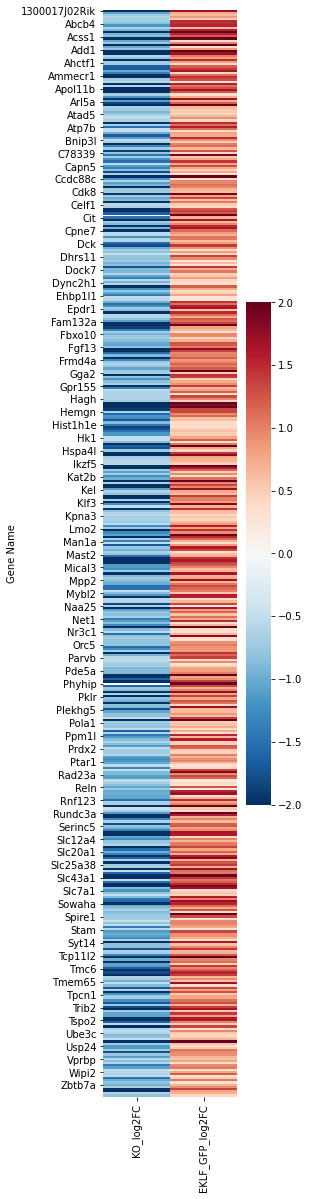

In [32]:
plt.figure(figsize=(3,20))
ko_gfp_heatmap = sns.heatmap(ko_gfp_merge, vmin=-2, vmax=2, yticklabels=6, cmap='RdBu_r')

In [21]:
deseq_gfp = pd.read_csv('deseq_gfp.csv') ####### all DEGs in EKLF/GFP+ vs EKLF/GFP-
deseq_gfp.head()

,Unnamed: 0,GENEID,GENENAME,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,1,ENSMUSG00000020125,Elane,3554.467052,-4.464518,0.159092,-28.062453,2.815384e-173,4.312324e-169
1,2,ENSMUSG00000073902,Gm1966,6286.501015,-4.249592,0.162146,-26.208383,2.132650e-151,1.633290e-147
2,3,ENSMUSG00000039109,F13a1,2464.215605,-4.156207,0.159199,-26.106928,3.041871e-150,1.553078e-146
3,4,ENSMUSG00000040314,Ctsg,2227.136043,-4.477199,0.173343,-25.828485,4.245835e-147,1.625836e-143
4,5,ENSMUSG00000018819,Lsp1,1347.470067,-4.176046,0.164338,-25.411295,1.891955e-142,5.795816e-139


In [22]:
gfp_sig = deseq_gfp.loc[:,['GENENAME','log2FoldChange']]
gfp_sig.head()

,GENENAME,log2FoldChange
0,Elane,-4.464518
1,Gm1966,-4.249592
2,F13a1,-4.156207
3,Ctsg,-4.477199
4,Lsp1,-4.176046


In [60]:
go_gfp.head()

,Gene ID,Gene Name,log2FoldChange,pvalue,padj
0,ENSMUSG00000020900,Myh10,1.426303,1.123283e-45,2.150666e-43
1,ENSMUSG00000058620,Adra2b,1.712878,2.689533e-41,3.814405e-39
2,ENSMUSG00000034127,Tspan8,1.593912,2.330972e-39,3.000294e-37
3,ENSMUSG00000028542,Slc6a9,1.691041,1.842520e-38,2.204834e-36
4,ENSMUSG00000027333,Smox,1.424975,2.079534e-38,2.450171e-36


In [63]:
ko_gfp_merge.shape

(504, 3)

In [24]:
#### Combining EKLF-/- all DEGs (above 2-fold) with EKLF/GFP DEGs data ##########
ko_gfp_merge_all = go_ko.merge(gfp_sig, on='Gene Name')
ko_gfp_merge_all.head()

,Gene Name,foldChange,log2FoldChange_x,pvalue,padj,log2FoldChange_y
0,0610010F05Rik,0.621711,-0.685685,1.981741e-04,3.984913e-03,-0.083892
1,0610010K14Rik,1.508792,0.593394,7.713577e-04,1.171126e-02,-0.041612
2,1300017J02Rik,0.035592,-4.812323,6.115374e-88,1.838383e-84,1.710540
3,1700023E05Rik,4.631878,2.211597,4.581243e-06,1.607624e-04,1.950365
4,1810043H04Rik,1.732752,0.793066,2.544609e-03,2.888427e-02,-0.002411


In [25]:
ko_gfp_merge_all.drop(['foldChange','pvalue','padj'], axis='columns',inplace=True)

In [26]:
ko_gfp_merge_all.head()

,Gene Name,log2FoldChange_x,log2FoldChange_y
0,0610010F05Rik,-0.685685,-0.083892
1,0610010K14Rik,0.593394,-0.041612
2,1300017J02Rik,-4.812323,1.710540
3,1700023E05Rik,2.211597,1.950365
4,1810043H04Rik,0.793066,-0.002411


In [27]:
ko_gfp_merge_all.rename(columns={'log2FoldChange_x':'KO/WT log2 FC','log2FoldChange_y':'EKLF-GFP+/EKLF- log2 FC'},
                       inplace=True)
ko_gfp_merge_all.head()

,Gene Name,KO/WT log2 FC,EKLF-GFP+/EKLF- log2 FC
0,0610010F05Rik,-0.685685,-0.083892
1,0610010K14Rik,0.593394,-0.041612
2,1300017J02Rik,-4.812323,1.710540
3,1700023E05Rik,2.211597,1.950365
4,1810043H04Rik,0.793066,-0.002411


/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 55 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


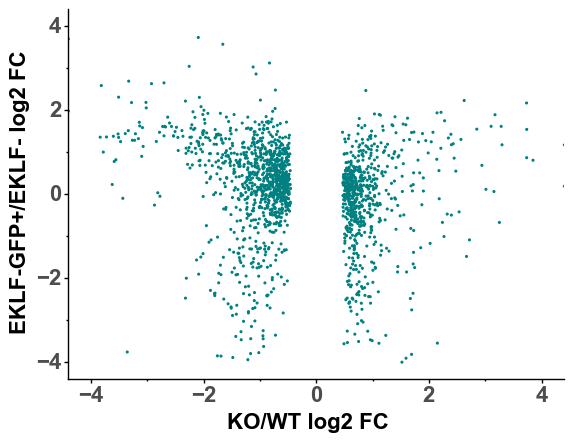

<ggplot: (311505729)>

In [85]:
scatterplot = ggplot(ko_gfp_merge_all, aes(x='KO/WT log2 FC', y='EKLF-GFP+/EKLF- log2 FC')) + geom_point(color='teal', size=0.25) + xlim(-4,4) + theme_classic() + theme(text = element_text(family = "Arial", size = 16, face = "bold")) + ylim(-4,4)
scatterplot

In [28]:
ko_gfp_merge_all_exp = ko_gfp_merge_all.loc[:,['KO/WT log2 FC','EKLF-GFP+/EKLF- log2 FC']]
ko_gfp_merge_all_exp.head()

,KO/WT log2 FC,EKLF-GFP+/EKLF- log2 FC
0,-0.685685,-0.083892
1,0.593394,-0.041612
2,-4.812323,1.710540
3,2.211597,1.950365
4,0.793066,-0.002411


In [29]:
ko_gfp_merge_all_exp.corr()

,KO/WT log2 FC,EKLF-GFP+/EKLF- log2 FC
KO/WT log2 FC,1.000000,-0.115438
EKLF-GFP+/EKLF- log2 FC,-0.115438,1.000000


In [33]:
unique = pd.read_csv('fl_mac_unique_genes') ####### E13.5 FL F4/80+ signature genes 
unique.head()

,Gene Name
0,H19
1,Stfa1
2,BC100530
3,Igf2
4,Olfm4


In [34]:
#### EKLF/GFP expression of signature genes ##########
uniq_gfp_merge = go_gfp.merge(unique, on='Gene Name')
uniq_gfp_merge.head()

,Gene ID,Gene Name,log2FoldChange,pvalue,padj
0,ENSMUSG00000058620,Adra2b,1.712878,2.689533e-41,3.814405e-39
1,ENSMUSG00000025665,Rps6ka6,0.953514,7.419975e-08,6.709077e-07
2,ENSMUSG00000052234,Epx,1.121853,7.565829e-07,5.879544e-06
3,ENSMUSG00000036136,Fam110c,1.282406,3.078226e-06,2.195027e-05
4,ENSMUSG00000027072,Prg3,0.860547,3.966197e-05,2.352836e-04
5,ENSMUSG00000020419,Hormad2,1.506318,6.050573e-05,3.459374e-04
6,ENSMUSG00000028125,Abca4,1.479205,6.221223e-05,3.547406e-04
7,ENSMUSG00000049493,Pls1,1.545216,1.999177e-04,1.020033e-03
8,ENSMUSG00000031351,Zfp185,2.239110,2.262429e-04,1.138798e-03
9,ENSMUSG00000040726,Hesx1,5.982864,7.437141e-04,3.333763e-03


In [35]:
uniq_gfp_merge.drop('Gene ID', axis=1, inplace=True )
uniq_gfp_merge.head()

,Gene Name,log2FoldChange,pvalue,padj
0,Adra2b,1.712878,2.689533e-41,3.814405e-39
1,Rps6ka6,0.953514,7.419975e-08,6.709077e-07
2,Epx,1.121853,7.565829e-07,5.879544e-06
3,Fam110c,1.282406,3.078226e-06,2.195027e-05
4,Prg3,0.860547,3.966197e-05,2.352836e-04


In [36]:
####### EKLF-/- vs EKLF+/+ expression of signature genes #########
uniq_ko_merge = ko_down.merge(unique, on='Gene Name')
uniq_ko_merge.head()

,Gene Name,foldChange,log2FoldChange,pvalue,padj
0,9930014A18Rik,0.592261,-0.755694,1.156025e-03,1.610133e-02
1,Adam11,0.373620,-1.420355,3.271085e-03,3.500730e-02
2,Adam12,0.381534,-1.390118,5.114181e-04,8.462797e-03
3,Adra2b,0.113297,-3.141820,2.132855e-53,1.923516e-50
4,Ano2,0.131676,-2.924931,1.446330e-08,8.724899e-07
5,Arhgap28,0.467120,-1.098135,5.184576e-03,4.840279e-02
6,C030034L19Rik,0.260249,-1.942034,5.942000e-04,9.526743e-03
7,Ccdc135,0.298591,-1.743755,3.977541e-03,4.021463e-02
8,Ephb2,0.396856,-1.333313,4.840153e-04,8.065119e-03
9,Fat4,0.229216,-2.125220,4.989841e-06,1.730803e-04


In [37]:
wt_ko_log2 = pd.read_csv('WT_KO_log2.txt', sep='\t') ##### all genes normalized expression in WT and KO
wt_ko_log2.head()

,id,GWEIGHT,log2WT,log2KO,log2KO-WT
0,EWEIGHT,NaN,0.500000,0.500000,2.000000
1,0610005C13Rik,1.0,4.404731,4.484404,0.079673
2,0610007C21Rik,1.0,7.797628,8.216871,0.419243
3,0610007L01Rik,1.0,10.769339,10.598834,-0.170505
4,0610007N19Rik,1.0,1.679568,1.827651,0.148083


In [38]:
wt_ko_log2.drop(0, inplace=True)
wt_ko_log2.head()

,id,GWEIGHT,log2WT,log2KO,log2KO-WT
1,0610005C13Rik,1.0,4.404731,4.484404,0.079673
2,0610007C21Rik,1.0,7.797628,8.216871,0.419243
3,0610007L01Rik,1.0,10.769339,10.598834,-0.170505
4,0610007N19Rik,1.0,1.679568,1.827651,0.148083
5,0610007P08Rik,1.0,9.276782,8.850831,-0.425951


In [39]:
wt_ko_log2.drop('GWEIGHT', axis=1, inplace=True)
wt_ko_log2.head()

,id,log2WT,log2KO,log2KO-WT
1,0610005C13Rik,4.404731,4.484404,0.079673
2,0610007C21Rik,7.797628,8.216871,0.419243
3,0610007L01Rik,10.769339,10.598834,-0.170505
4,0610007N19Rik,1.679568,1.827651,0.148083
5,0610007P08Rik,9.276782,8.850831,-0.425951


In [40]:
wt_ko_log2.rename(columns={'id':'Gene Name'}, inplace=True)
wt_ko_log2.head()

,Gene Name,log2WT,log2KO,log2KO-WT
1,0610005C13Rik,4.404731,4.484404,0.079673
2,0610007C21Rik,7.797628,8.216871,0.419243
3,0610007L01Rik,10.769339,10.598834,-0.170505
4,0610007N19Rik,1.679568,1.827651,0.148083
5,0610007P08Rik,9.276782,8.850831,-0.425951


In [41]:
uniq_ko_log2 = uniq_ko_merge.merge(wt_ko_log2, on='Gene Name', sort=True)
uniq_ko_log2.head()

,Gene Name,foldChange,log2FoldChange,pvalue,padj,log2WT,log2KO,log2KO-WT
0,9930014A18Rik,0.592261,-0.755694,1.156025e-03,1.610133e-02,7.147981,6.399273,-0.748708
1,Adam11,0.373620,-1.420355,3.271085e-03,3.500730e-02,4.779850,3.444957,-1.334892
2,Adam12,0.381534,-1.390118,5.114181e-04,8.462797e-03,5.417226,4.080824,-1.336403
3,Adra2b,0.113297,-3.141820,2.132855e-53,1.923516e-50,9.685655,6.557481,-3.128174
4,Ano2,0.131676,-2.924931,1.446330e-08,8.724899e-07,5.639830,2.894100,-2.745731


In [42]:
uniq_ko_log2.drop(['foldChange','log2KO-WT','pvalue','padj'], axis=1, inplace=True)
uniq_ko_log2.head()

,Gene Name,log2FoldChange,log2WT,log2KO
0,9930014A18Rik,-0.755694,7.147981,6.399273
1,Adam11,-1.420355,4.779850,3.444957
2,Adam12,-1.390118,5.417226,4.080824
3,Adra2b,-3.141820,9.685655,6.557481
4,Ano2,-2.924931,5.639830,2.894100


In [43]:
uniq_ko_log2.set_index('Gene Name', inplace=True)
uniq_ko_log2.head()

,log2FoldChange,log2WT,log2KO
Gene Name,,,
9930014A18Rik,-0.755694,7.147981,6.399273
Adam11,-1.420355,4.779850,3.444957
Adam12,-1.390118,5.417226,4.080824
Adra2b,-3.141820,9.685655,6.557481
Ano2,-2.924931,5.639830,2.894100


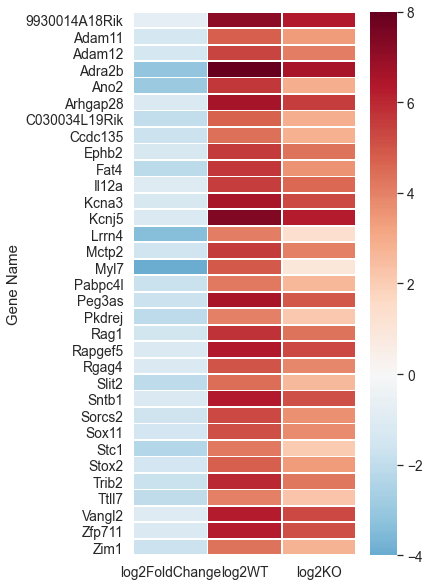

In [44]:
##### Signature genes WT vs KO ############
sns.set(font='Arial', font_scale=1.25)
plt.figure(figsize=(5,10))
ko_uniq_heatmap = sns.heatmap(uniq_ko_log2, cmap='RdBu_r', linewidths=0.75, center=0, vmax=8, vmin=-4)

In [45]:
gfp_fpkm = pd.read_csv('gfp_norm_counts.csv')
gfp_fpkm.head()

,Unnamed: 0,GENEID,GENENAME,1_EKLF_GFP,2_EKLF_GFP,9_EKLF_GFP,3_minus,4_minus,10_minus
0,ENSMUSG00000000001,ENSMUSG00000000001,Gnai3,3259.648497,2802.905681,3086.691770,3752.511428,3739.914283,3362.994850
1,ENSMUSG00000000028,ENSMUSG00000000028,Cdc45,2225.617830,3171.147885,3457.019893,2402.717032,2444.022901,2954.477466
2,ENSMUSG00000000037,ENSMUSG00000000037,Scml2,357.964102,421.882861,429.743624,322.061619,255.702706,358.581039
3,ENSMUSG00000000049,ENSMUSG00000000049,Apoh,134.271235,185.550610,80.256098,113.544626,174.787610,140.216072
4,ENSMUSG00000000056,ENSMUSG00000000056,Narf,4015.492542,4746.007403,4334.619169,1966.734567,2049.763386,2145.407340


In [46]:
gfp_fpkm.drop(['Unnamed: 0'], axis=1, inplace=True)
gfp_fpkm.head()

,GENEID,GENENAME,1_EKLF_GFP,2_EKLF_GFP,9_EKLF_GFP,3_minus,4_minus,10_minus
0,ENSMUSG00000000001,Gnai3,3259.648497,2802.905681,3086.691770,3752.511428,3739.914283,3362.994850
1,ENSMUSG00000000028,Cdc45,2225.617830,3171.147885,3457.019893,2402.717032,2444.022901,2954.477466
2,ENSMUSG00000000037,Scml2,357.964102,421.882861,429.743624,322.061619,255.702706,358.581039
3,ENSMUSG00000000049,Apoh,134.271235,185.550610,80.256098,113.544626,174.787610,140.216072
4,ENSMUSG00000000056,Narf,4015.492542,4746.007403,4334.619169,1966.734567,2049.763386,2145.407340


In [47]:
deseq_gfp.drop(['Unnamed: 0','baseMean','lfcSE','stat'], axis=1, inplace=True)
deseq_gfp.head()

,GENEID,GENENAME,log2FoldChange,pvalue,padj
0,ENSMUSG00000020125,Elane,-4.464518,2.815384e-173,4.312324e-169
1,ENSMUSG00000073902,Gm1966,-4.249592,2.132650e-151,1.633290e-147
2,ENSMUSG00000039109,F13a1,-4.156207,3.041871e-150,1.553078e-146
3,ENSMUSG00000040314,Ctsg,-4.477199,4.245835e-147,1.625836e-143
4,ENSMUSG00000018819,Lsp1,-4.176046,1.891955e-142,5.795816e-139


In [48]:
gfp_log2 = pd.read_csv('gfp_log2.csv') ####### All genes EKLF/GFP log normalized expression
gfp_log2.head()

,GENEID,GENENAME,EKLF_GFP_log2,EKLF_minus_log2
0,ENSMUSG00000000001,Gnai3,11.574475,11.821165
1,ENSMUSG00000000028,Cdc45,11.527116,11.344521
2,ENSMUSG00000000037,Scml2,8.655341,8.285934
3,ENSMUSG00000000049,Apoh,7.059175,7.158352
4,ENSMUSG00000000056,Narf,12.091889,11.004198


In [49]:
gfp_log2_deseq = deseq_gfp.merge(gfp_log2, on='GENEID')
gfp_log2_deseq.head()

,GENEID,GENENAME_x,log2FoldChange,pvalue,padj,GENENAME_y,EKLF_GFP_log2,EKLF_minus_log2
0,ENSMUSG00000020125,Elane,-4.464518,2.815384e-173,4.312324e-169,Elane,8.269193,12.731408
1,ENSMUSG00000073902,Gm1966,-4.249592,2.132650e-151,1.633290e-147,Gm1966,9.295265,13.544086
2,ENSMUSG00000039109,F13a1,-4.156207,3.041871e-150,1.553078e-146,F13a1,8.033625,12.188093
3,ENSMUSG00000040314,Ctsg,-4.477199,4.245835e-147,1.625836e-143,Ctsg,7.583475,12.057474
4,ENSMUSG00000018819,Lsp1,-4.176046,1.891955e-142,5.795816e-139,Lsp1,7.149712,11.317946


In [50]:
gfp_log2_deseq.drop(['GENENAME_y','pvalue'], axis=1, inplace=True)
gfp_log2_deseq.head()

,GENEID,GENENAME_x,log2FoldChange,padj,EKLF_GFP_log2,EKLF_minus_log2
0,ENSMUSG00000020125,Elane,-4.464518,4.312324e-169,8.269193,12.731408
1,ENSMUSG00000073902,Gm1966,-4.249592,1.633290e-147,9.295265,13.544086
2,ENSMUSG00000039109,F13a1,-4.156207,1.553078e-146,8.033625,12.188093
3,ENSMUSG00000040314,Ctsg,-4.477199,1.625836e-143,7.583475,12.057474
4,ENSMUSG00000018819,Lsp1,-4.176046,5.795816e-139,7.149712,11.317946


In [51]:
gfp_log2_deseq.rename(columns={'GENENAME_x':'Gene Name','GENEID':'Gene ID'}, inplace=True)
gfp_log2_deseq.head()

,Gene ID,Gene Name,log2FoldChange,padj,EKLF_GFP_log2,EKLF_minus_log2
0,ENSMUSG00000020125,Elane,-4.464518,4.312324e-169,8.269193,12.731408
1,ENSMUSG00000073902,Gm1966,-4.249592,1.633290e-147,9.295265,13.544086
2,ENSMUSG00000039109,F13a1,-4.156207,1.553078e-146,8.033625,12.188093
3,ENSMUSG00000040314,Ctsg,-4.477199,1.625836e-143,7.583475,12.057474
4,ENSMUSG00000018819,Lsp1,-4.176046,5.795816e-139,7.149712,11.317946


In [52]:
gfp_log2_deseq.drop('Gene ID', axis=1, inplace=True)
gfp_log2_deseq.head()

,Gene Name,log2FoldChange,padj,EKLF_GFP_log2,EKLF_minus_log2
0,Elane,-4.464518,4.312324e-169,8.269193,12.731408
1,Gm1966,-4.249592,1.633290e-147,9.295265,13.544086
2,F13a1,-4.156207,1.553078e-146,8.033625,12.188093
3,Ctsg,-4.477199,1.625836e-143,7.583475,12.057474
4,Lsp1,-4.176046,5.795816e-139,7.149712,11.317946


In [54]:
uniq_gfp_merge = uniq_gfp_merge.merge(gfp_log2_deseq, on='Gene Name')
uniq_gfp_merge.head()

,Gene Name,log2FoldChange_x,pvalue,padj_x,log2FoldChange_y,padj_y,EKLF_GFP_log2_x,EKLF_minus_log2_x,log2FoldChange,padj,EKLF_GFP_log2_y,EKLF_minus_log2_y
0,Adra2b,1.712878,2.689533e-41,3.814405e-39,1.712878,3.814405e-39,10.519164,8.804784,1.712878,3.814405e-39,10.519164,8.804784
1,Rps6ka6,0.953514,7.419975e-08,6.709077e-07,0.953514,6.709077e-07,10.801011,9.847498,0.953514,6.709077e-07,10.801011,9.847498
2,Epx,1.121853,7.565829e-07,5.879544e-06,1.121853,5.879544e-06,11.461649,10.339259,1.121853,5.879544e-06,11.461649,10.339259
3,Fam110c,1.282406,3.078226e-06,2.195027e-05,1.282406,2.195027e-05,6.839717,5.557826,1.282406,2.195027e-05,6.839717,5.557826
4,Prg3,0.860547,3.966197e-05,2.352836e-04,0.860547,2.352836e-04,11.005217,10.144519,0.860547,2.352836e-04,11.005217,10.144519


In [55]:
uniq_gfp_merge.drop(['pvalue','log2FoldChange_y','padj_y'], axis=1, inplace=True)
uniq_gfp_merge.head()

,Gene Name,log2FoldChange_x,padj_x,EKLF_GFP_log2_x,EKLF_minus_log2_x,log2FoldChange,padj,EKLF_GFP_log2_y,EKLF_minus_log2_y
0,Adra2b,1.712878,3.814405e-39,10.519164,8.804784,1.712878,3.814405e-39,10.519164,8.804784
1,Rps6ka6,0.953514,6.709077e-07,10.801011,9.847498,0.953514,6.709077e-07,10.801011,9.847498
2,Epx,1.121853,5.879544e-06,11.461649,10.339259,1.121853,5.879544e-06,11.461649,10.339259
3,Fam110c,1.282406,2.195027e-05,6.839717,5.557826,1.282406,2.195027e-05,6.839717,5.557826
4,Prg3,0.860547,2.352836e-04,11.005217,10.144519,0.860547,2.352836e-04,11.005217,10.144519


In [56]:
uniq_gfp_merge.rename(columns={'log2FoldChange_x':'log2 FC','padj_x':'padj'}, inplace=True)
uniq_gfp_merge.head()

,Gene Name,log2 FC,padj,EKLF_GFP_log2_x,EKLF_minus_log2_x,log2FoldChange,padj,EKLF_GFP_log2_y,EKLF_minus_log2_y
0,Adra2b,1.712878,3.814405e-39,10.519164,8.804784,1.712878,3.814405e-39,10.519164,8.804784
1,Rps6ka6,0.953514,6.709077e-07,10.801011,9.847498,0.953514,6.709077e-07,10.801011,9.847498
2,Epx,1.121853,5.879544e-06,11.461649,10.339259,1.121853,5.879544e-06,11.461649,10.339259
3,Fam110c,1.282406,2.195027e-05,6.839717,5.557826,1.282406,2.195027e-05,6.839717,5.557826
4,Prg3,0.860547,2.352836e-04,11.005217,10.144519,0.860547,2.352836e-04,11.005217,10.144519


In [57]:
uniq_gfp_merge.drop('padj', axis=1, inplace=True)
uniq_gfp_merge.head()

,Gene Name,log2 FC,EKLF_GFP_log2_x,EKLF_minus_log2_x,log2FoldChange,EKLF_GFP_log2_y,EKLF_minus_log2_y
0,Adra2b,1.712878,10.519164,8.804784,1.712878,10.519164,8.804784
1,Rps6ka6,0.953514,10.801011,9.847498,0.953514,10.801011,9.847498
2,Epx,1.121853,11.461649,10.339259,1.121853,11.461649,10.339259
3,Fam110c,1.282406,6.839717,5.557826,1.282406,6.839717,5.557826
4,Prg3,0.860547,11.005217,10.144519,0.860547,11.005217,10.144519


In [59]:
uniq_gfp_merge.drop(['log2FoldChange','EKLF_GFP_log2_y','EKLF_minus_log2_y'], axis=1, inplace=True)
uniq_gfp_merge.head()

,Gene Name,log2 FC,EKLF_GFP_log2_x,EKLF_minus_log2_x
0,Adra2b,1.712878,10.519164,8.804784
1,Rps6ka6,0.953514,10.801011,9.847498
2,Epx,1.121853,11.461649,10.339259
3,Fam110c,1.282406,6.839717,5.557826
4,Prg3,0.860547,11.005217,10.144519


In [60]:
uniq_gfp_merge.columns=['Gene Name','log2 FC','EKLF/GFP+ log2 FPKM','EKLF/GFP- log2 FPKM']
uniq_gfp_merge.head()

,Gene Name,log2 FC,EKLF/GFP+ log2 FPKM,EKLF/GFP- log2 FPKM
0,Adra2b,1.712878,10.519164,8.804784
1,Rps6ka6,0.953514,10.801011,9.847498
2,Epx,1.121853,11.461649,10.339259
3,Fam110c,1.282406,6.839717,5.557826
4,Prg3,0.860547,11.005217,10.144519


In [61]:
uniq_gfp_merge.set_index('Gene Name', inplace=True)
uniq_gfp_merge.head()

,log2 FC,EKLF/GFP+ log2 FPKM,EKLF/GFP- log2 FPKM
Gene Name,,,
Adra2b,1.712878,10.519164,8.804784
Rps6ka6,0.953514,10.801011,9.847498
Epx,1.121853,11.461649,10.339259
Fam110c,1.282406,6.839717,5.557826
Prg3,0.860547,11.005217,10.144519


In [62]:
uniq_gfp_merge.drop('log2 FC', axis=1, inplace=True)

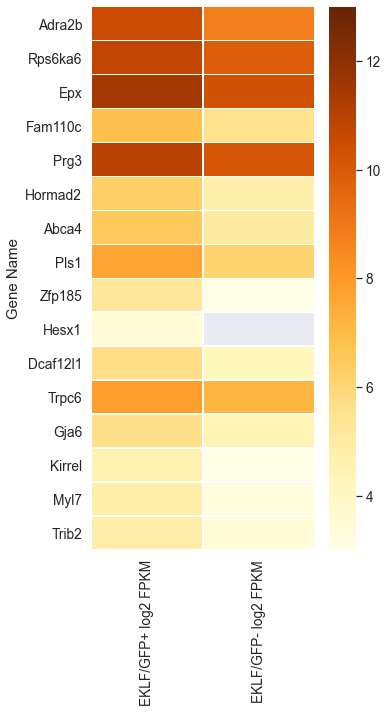

In [63]:
######## Signature genes EKLF/GFP+ vs EKLF/GFP- ###########
plt.figure(figsize=(5,10))
uniq_gfp_heat = sns.heatmap(uniq_gfp_merge, cmap='YlOrBr', vmax=13, vmin=3, linewidths=0.75)

In [64]:
ko_gfp_merge_copy = ko_gfp_merge.copy()
ko_gfp_merge_copy.head()

,KO_log2FC,EKLF_GFP_log2FC
Gene Name,,
1300017J02Rik,-4.812323,1.710540
2310022B05Rik,-1.053041,0.735432
4931406P16Rik,-0.720237,0.632105
5730508B09Rik,-0.607627,0.860983
Abca7,-0.718219,0.476437


In [65]:
ko_gfp_merge_copy.reset_index(inplace=True)
ko_gfp_merge_copy.head()

,Gene Name,KO_log2FC,EKLF_GFP_log2FC
0,1300017J02Rik,-4.812323,1.710540
1,2310022B05Rik,-1.053041,0.735432
2,4931406P16Rik,-0.720237,0.632105
3,5730508B09Rik,-0.607627,0.860983
4,Abca7,-0.718219,0.476437


In [66]:
centrimo_tfs = pd.read_csv('TF_names.txt') ###### trancription factors enriched in promoters of EKLF-dependent genes
centrimo_tfs.head()

,Gene Name
0,Klf3
1,Foxm1
2,E2f4
3,Nr2E3
4,Sp3


In [67]:
tf_ko_gfp = centrimo_tfs.merge(ko_gfp_merge_copy, on='Gene Name')
tf_ko_gfp

,Gene Name,KO_log2FC,EKLF_GFP_log2FC
0,Klf3,-3.557081,0.820764
1,E2f4,-1.212357,0.737824
2,Klf1,-2.535386,1.389233
3,Sp4,-0.965921,1.097673
4,E2f1,-0.560399,0.333798
5,E2f2,-2.225102,1.207113


In [68]:
tf_ko_gfp_copy = tf_ko_gfp.copy()
tf_ko_gfp_copy.set_index('Gene Name', inplace=True)
tf_ko_gfp_copy

,KO_log2FC,EKLF_GFP_log2FC
Gene Name,,
Klf3,-3.557081,0.820764
E2f4,-1.212357,0.737824
Klf1,-2.535386,1.389233
Sp4,-0.965921,1.097673
E2f1,-0.560399,0.333798
E2f2,-2.225102,1.207113


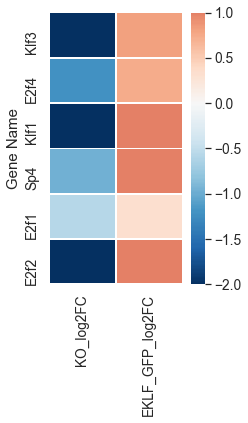

In [69]:
#### EKLF-dependent transcription circuit expression #############
plt.figure(figsize=(3,5))
tf_exp_plot = sns.heatmap(tf_ko_gfp_copy, cmap = 'RdBu_r', vmax=1, vmin=-2, linewidths=0.75, center=0)

In [70]:
trans = pd.read_csv('transcription_genes.txt') ##### all EKLF-dependent transcription factors
trans.head()

,Gene Name
0,Adrb2
1,Arrb1
2,Atp2b4
3,Bcl11a
4,Cpeb3


In [71]:
trans_exp = trans.merge(ko_gfp_merge_copy, on='Gene Name')
trans_exp.head()

,Gene Name,KO_log2FC,EKLF_GFP_log2FC
0,Adrb2,-0.581605,1.035588
1,Arrb1,-1.814990,1.191186
2,Atp2b4,-2.506900,1.491229
3,Bcl11a,-1.660678,0.745306
4,Cpeb3,-0.928137,1.640891


In [72]:
trans_exp.set_index('Gene Name', inplace=True)
trans_exp.head()

,KO_log2FC,EKLF_GFP_log2FC
Gene Name,,
Adrb2,-0.581605,1.035588
Arrb1,-1.814990,1.191186
Atp2b4,-2.506900,1.491229
Bcl11a,-1.660678,0.745306
Cpeb3,-0.928137,1.640891


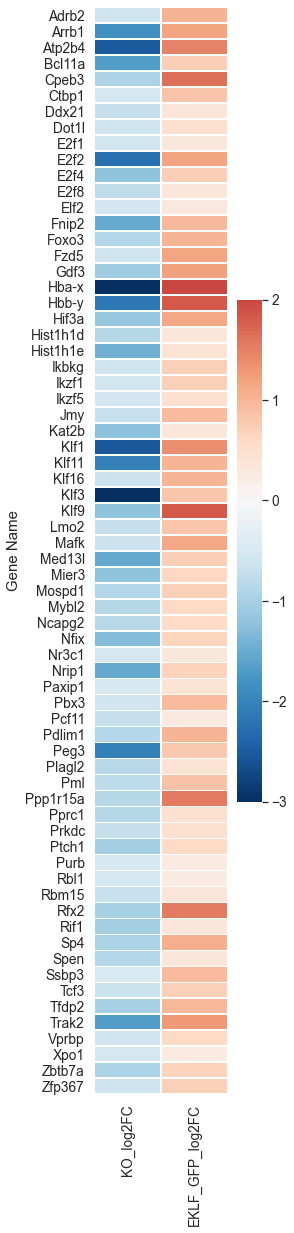

In [73]:
plt.figure(figsize=(3,20))
trans_exp_plot = sns.heatmap(trans_exp, cmap='RdBu_r', linewidths=0.75, center=0, vmax=2, vmin=-3)